# Data Analyis on Customers defaulted on loans

In [349]:
# Import Libraries
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#Import SciKit Learn and Math
import scipy
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

#estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

# import/integrate data set in a varaible

In [350]:
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [351]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [352]:
credit=credit.drop(['ID'], axis=1)

In [353]:
credit.describe()

LIMIT_BAL      MARRIAGE           AGE         PAY_0         PAY_2  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.551867     35.485500     -0.016700     -0.133767   
std     129747.661567      0.521970      9.217904      1.123802      1.197186   
min      10000.000000      0.000000     21.000000     -2.000000     -2.000000   
25%      50000.000000      1.000000     28.000000     -1.000000     -1.000000   
50%     140000.000000      2.000000     34.000000      0.000000      0.000000   
75%     240000.000000      2.000000     41.000000      0.000000      0.000000   
max    1000000.000000      3.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 21 columns]

In [354]:
#replace negative to positive values
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)
credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [355]:
credit.head()

LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000  female  university         1   24      2      2      0      0   
1     120000  female  university         2   26      0      2      0      0   
2      90000  female  university         2   34      0      0      0      0   
3      50000  female  university         1   37      0      0      0      0   
4      50000    male  university         1   57      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 24 columns]

In [356]:
credit.rename(columns = {'default payment next month':'default'}, inplace = True)

In [357]:
#DataFrame has 30,000 rows, & 25 columns)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null object
dtypes: int64(21), object(3)
memory usage: 5.5+ MB


In [358]:
#DataFrame is two Dimentional
credit.ndim

2

In [359]:
#drop duplicates
credit = credit.drop_duplicates()
#check for missing values
print(credit.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [360]:
#Confirm that 'SEX' has only 2 unique entries and can be Label Encoded
credit['SEX'].describe()

count      29964
unique         2
top       female
freq       18090
Name: SEX, dtype: object

In [361]:
#Confirm that 'default' has only 2 unique entries and can be Label Encoded
credit['default'].describe()

count           29964
unique              2
top       not default
freq            23334
Name: default, dtype: object

In [362]:
#Confirm that "Education" has 4 unique entries and requires One Hot Encoding
credit['EDUCATION'].describe()

count          29964
unique             4
top       university
freq           14019
Name: EDUCATION, dtype: object

In [363]:
#Label Encode 'SEX' to binary 0 and 1 for female and male
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])

In [364]:
#Label Encode 'default' to binary 0 and 1 for 'default' and 'not default', respectively
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])

In [365]:
#Separate credit limit into 5 bins
binslimit = [0,200000,400000,600000,800000,1000000]
#group names
limits = ['A','B','C','D','E']

In [366]:
# Create LIMIT_BIN and label encode to create LIMIT_BIN_CAT
le = LabelEncoder()
credit['LIMIT_BIN'] = pd.cut(credit.LIMIT_BAL, binslimit, labels = limits)
credit['LIMIT_BIN_CAT'] = le.fit_transform(credit['LIMIT_BIN'])
credit

LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    0   university         1   24      2      2      0      0   
1         120000    0   university         2   26      0      2      0      0   
2          90000    0   university         2   34      0      0      0      0   
3          50000    0   university         1   37      0      0      0      0   
4          50000    1   university         1   57      0      0      0      0   
...          ...  ...          ...       ...  ...    ...    ...    ...    ...   
29995     220000    1  high school         1   39      0      0      0      0   
29996     150000    1  high school         2   43      0      0      0      0   
29997      30000    1   university         2   37      4      3      2      0   
29998      80000    1  high school         1   41      1      0      0      0   
29999      50000    1   university         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0          0  ...          0         0       689         0         0   
1          0  ...       3261         0      1000      1000      1000   
2          0  ...      15549      1518      1500      1000      1000   
3          0  ...      29547      2000      2019      1200      1100   
4          0  ...      19131      2000     36681     10000      9000   
...      ...  ...        ...       ...       ...       ...       ...   
29995      0  ...      15980      8500     20000      5003      3047   
29996      0  ...          0      1837      3526      8998       129   
29997      0  ...      19357         0         0     22000      4200   
29998      0  ...      48944     85900      3409      1178      1926   
29999      0  ...      15313      2078      1800      1430      1000   

       PAY_AMT5  PAY_AMT6  default  LIMIT_BIN  LIMIT_BIN_CAT  
0             0         0        0          A              0  
1             0      2000        0          A              0  
2          1000      5000        1          A              0  
3          1069      1000        1          A              0  
4           689       679        1          A              0  
...         ...       ...      ...        ...            ...  
29995      5000      1000        1          B              1  
29996         0         0        1          A              0  
29997      2000      3100        0          A              0  
29998     52964      1804        0          A              0  
29999      1000      1000        0          A              0  

[29964 rows x 26 columns]

In [367]:
#drop LIMIT_BIN
credit=credit.drop(['LIMIT_BIN'], axis=1)

In [368]:
#check for data types (numeric/nominal)
credit.dtypes

LIMIT_BAL         int64
SEX               int64
EDUCATION        object
MARRIAGE          int64
AGE               int64
PAY_0             int64
PAY_2             int64
PAY_3             int64
PAY_4             int64
PAY_5             int64
PAY_6             int64
BILL_AMT1         int64
BILL_AMT2         int64
BILL_AMT3         int64
BILL_AMT4         int64
BILL_AMT5         int64
BILL_AMT6         int64
PAY_AMT1          int64
PAY_AMT2          int64
PAY_AMT3          int64
PAY_AMT4          int64
PAY_AMT5          int64
PAY_AMT6          int64
default           int64
LIMIT_BIN_CAT     int64
dtype: object

In [369]:
#print column heading names in dataframe for use to generate plots
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'LIMIT_BIN_CAT'],
      dtype='object')


# EDA Exploratory Data Analysis

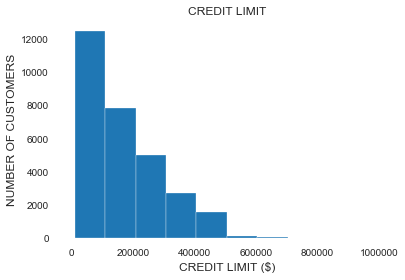

In [370]:
#histogram of customer credit limit with 10 bins
plt.hist(credit['LIMIT_BAL'], bins=10)
plt.xlabel('CREDIT LIMIT ($)', fontsize='large')
plt.ylabel('NUMBER OF CUSTOMERS', fontsize='large')
plt.title('CREDIT LIMIT', fontsize='large')
plt.show()

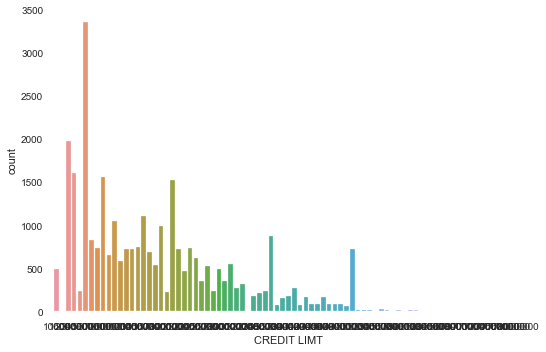

In [371]:
#Plot of CREDIT LIMIT
fg = sns.catplot('LIMIT_BAL', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('CREDIT LIMT')

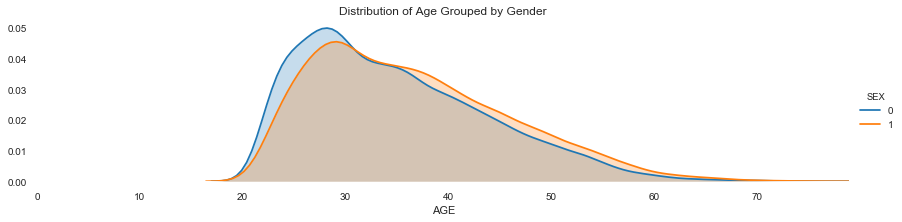

In [372]:
# distribution of age grouped by gender
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

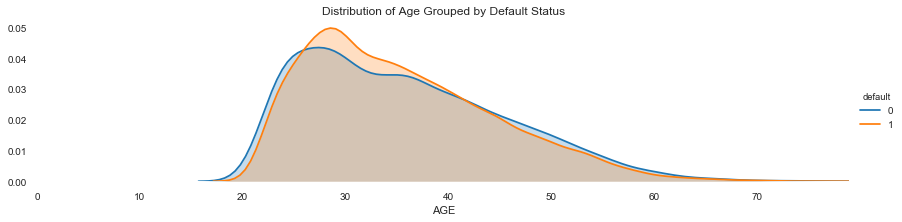

In [373]:
#Distribution of Age grouped by Default Status
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default Status')
fig.add_legend()

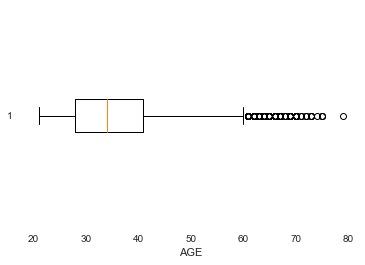

In [374]:
#Box Plot of Age
plt.boxplot(credit.AGE, vert=False)
plt.xlabel('AGE')
plt.show()

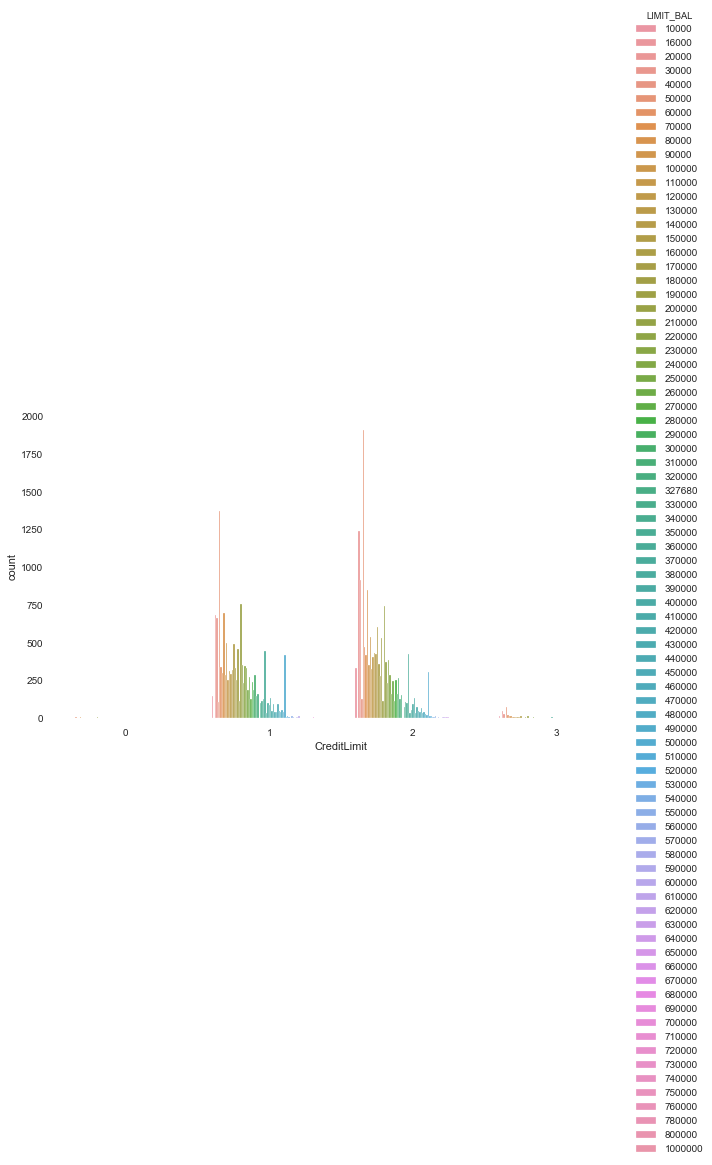

In [375]:
# Credit Limit Group by Pay Amount
g = sns.catplot('MARRIAGE', data=credit, hue='LIMIT_BAL', kind='count', aspect=1.75)
g.set_xlabels('CreditLimit')

In [376]:
# Number of customer default class grouped by Education.
credit.pivot_table('LIMIT_BAL', 'AGE', 'LIMIT_BIN_CAT', aggfunc=np.sum, margins=True)

LIMIT_BIN_CAT             0             1            2           3          4  \
AGE                                                                             
21             1.560000e+06           NaN          NaN         NaN        NaN   
22             2.124000e+07           NaN          NaN         NaN        NaN   
23             5.196000e+07  3.120000e+06     500000.0         NaN        NaN   
24             6.914000e+07  1.569000e+07     420000.0         NaN        NaN   
25             8.275000e+07  3.369000e+07    5320000.0         NaN        NaN   
26             9.496000e+07  5.881000e+07    7430000.0         NaN        NaN   
27             1.118500e+08  9.018000e+07   15820000.0         NaN        NaN   
28             1.028200e+08  1.077000e+08   27730000.0   2120000.0        NaN   
29             1.128400e+08  1.348200e+08   36240000.0   3180000.0        NaN   
30             9.301000e+07  1.369300e+08   32410000.0   1930000.0        NaN   
31             7.829000e+07  1.165200e+08   37470000.0   3090000.0        NaN   
32             7.350000e+07  1.135700e+08   42580000.0   2050000.0        NaN   
33             7.467000e+07  1.094200e+08   39450000.0   2010000.0        NaN   
34             7.375000e+07  1.103600e+08   44650000.0   2730000.0        NaN   
35             6.649000e+07  1.114400e+08   40110000.0   2660000.0        NaN   
36             6.885000e+07  1.053200e+08   39980000.0   1950000.0        NaN   
37             6.287000e+07  1.013600e+08   43150000.0   1410000.0        NaN   
38             5.577000e+07  8.520000e+07   37720000.0   3280000.0        NaN   
39             5.714000e+07  9.260000e+07   42800000.0   3220000.0        NaN   
40             5.927000e+07  7.430000e+07   26910000.0   3470000.0        NaN   
41             5.190000e+07  6.856000e+07   32310000.0   2800000.0        NaN   
42             4.827000e+07  6.849768e+07   30880000.0   1300000.0        NaN   
43             3.965000e+07  5.796000e+07   21030000.0   2030000.0        NaN   
44             4.141000e+07  6.146000e+07   27100000.0    650000.0        NaN   
45             3.829000e+07  4.600000e+07   20750000.0   1340000.0        NaN   
46             3.216600e+07  4.371000e+07   22910000.0   1430000.0        NaN   
47             2.828000e+07  3.898000e+07   15240000.0    630000.0  1000000.0   
48             2.880600e+07  3.575000e+07   13280000.0    780000.0        NaN   
49             2.615000e+07  3.236000e+07   18620000.0         NaN        NaN   
50             2.272000e+07  3.263000e+07   15590000.0   3390000.0        NaN   
51             2.014000e+07  2.214000e+07   11600000.0    710000.0        NaN   
52             1.843000e+07  1.841000e+07    9240000.0    620000.0        NaN   
53             1.691000e+07  2.470000e+07   14290000.0    800000.0        NaN   
54             1.443000e+07  1.333000e+07   13890000.0    760000.0        NaN   
55             1.335000e+07  1.311000e+07    4430000.0    660000.0        NaN   
56             9.640000e+06  1.285000e+07    2930000.0    730000.0        NaN   
57             7.260000e+06  7.970000e+06    4390000.0         NaN        NaN   
58             7.800000e+06  8.410000e+06    4410000.0         NaN        NaN   
59             4.880000e+06  3.820000e+06    2340000.0         NaN        NaN   
60             4.720000e+06  3.220000e+06     900000.0         NaN        NaN   
61             2.670000e+06  3.310000e+06    4340000.0         NaN        NaN   
62             2.380000e+06  3.590000e+06     940000.0         NaN        NaN   
63             2.020000e+06  2.630000e+06    1480000.0         NaN        NaN   
64             2.000000e+06  2.640000e+06    1880000.0    680000.0        NaN   
65             1.350000e+06  3.490000e+06          NaN         NaN        NaN   
66             1.340000e+06  3.530000e+06    1430000.0         NaN        NaN   
67             1.160000e+06  4.800000e+05    1530000.0         NaN        NaN   
68             5.900000e+05  3.

In [377]:
table = pd.crosstab(index=[credit.default,credit.MARRIAGE], columns=[credit.default,credit.SEX])

In [378]:
table.unstack()

default   0                                      1                             \
SEX       0                  1                   0                    1         
MARRIAGE  0     1     2   3  0     1     2   3   0     1     2    3   0     1   
default                                                                         
0         3  1858  1856  44  2  1343  1484  40   0     0     0    0   0     0   
1         0     0     0   0  0     0     0   0  37  6600  7544  148  12  3841   

default             
SEX                 
MARRIAGE     2   3  
default             
0            0   0  
1         5061  91

In [379]:
credit.LIMIT_BAL.describe()

count      29964.000000
mean      167441.585903
std       129762.280262
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

# Data Clean-up, Remove the outliers

In [380]:
#I found there are outlier for AGE > 60, so limit the column AGE to 60 years old.
credit = credit.loc[(credit['AGE'] <= 60)]

In [381]:
#I found there are outlier, limitng the columns values for Marriage & Credit Limit.
credit = credit.loc[(credit['MARRIAGE'] >= 1) & (credit['MARRIAGE'] <= 2)]

In [382]:
credit = credit.loc[(credit['LIMIT_BAL'] >= 10000) & (credit['LIMIT_BAL'] <= 600000)]

In [383]:
header = credit.dtypes.index

In [384]:
#Converts non-numeric column (Education) to 'dummy variables' so they can be used for regression.  Binary 0 or 1
credit = pd.get_dummies(credit)

In [385]:
#Ensure all data types are now numeric
credit.dtypes

LIMIT_BAL                    int64
SEX                          int64
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int64
LIMIT_BIN_CAT                int64
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

# Correlation

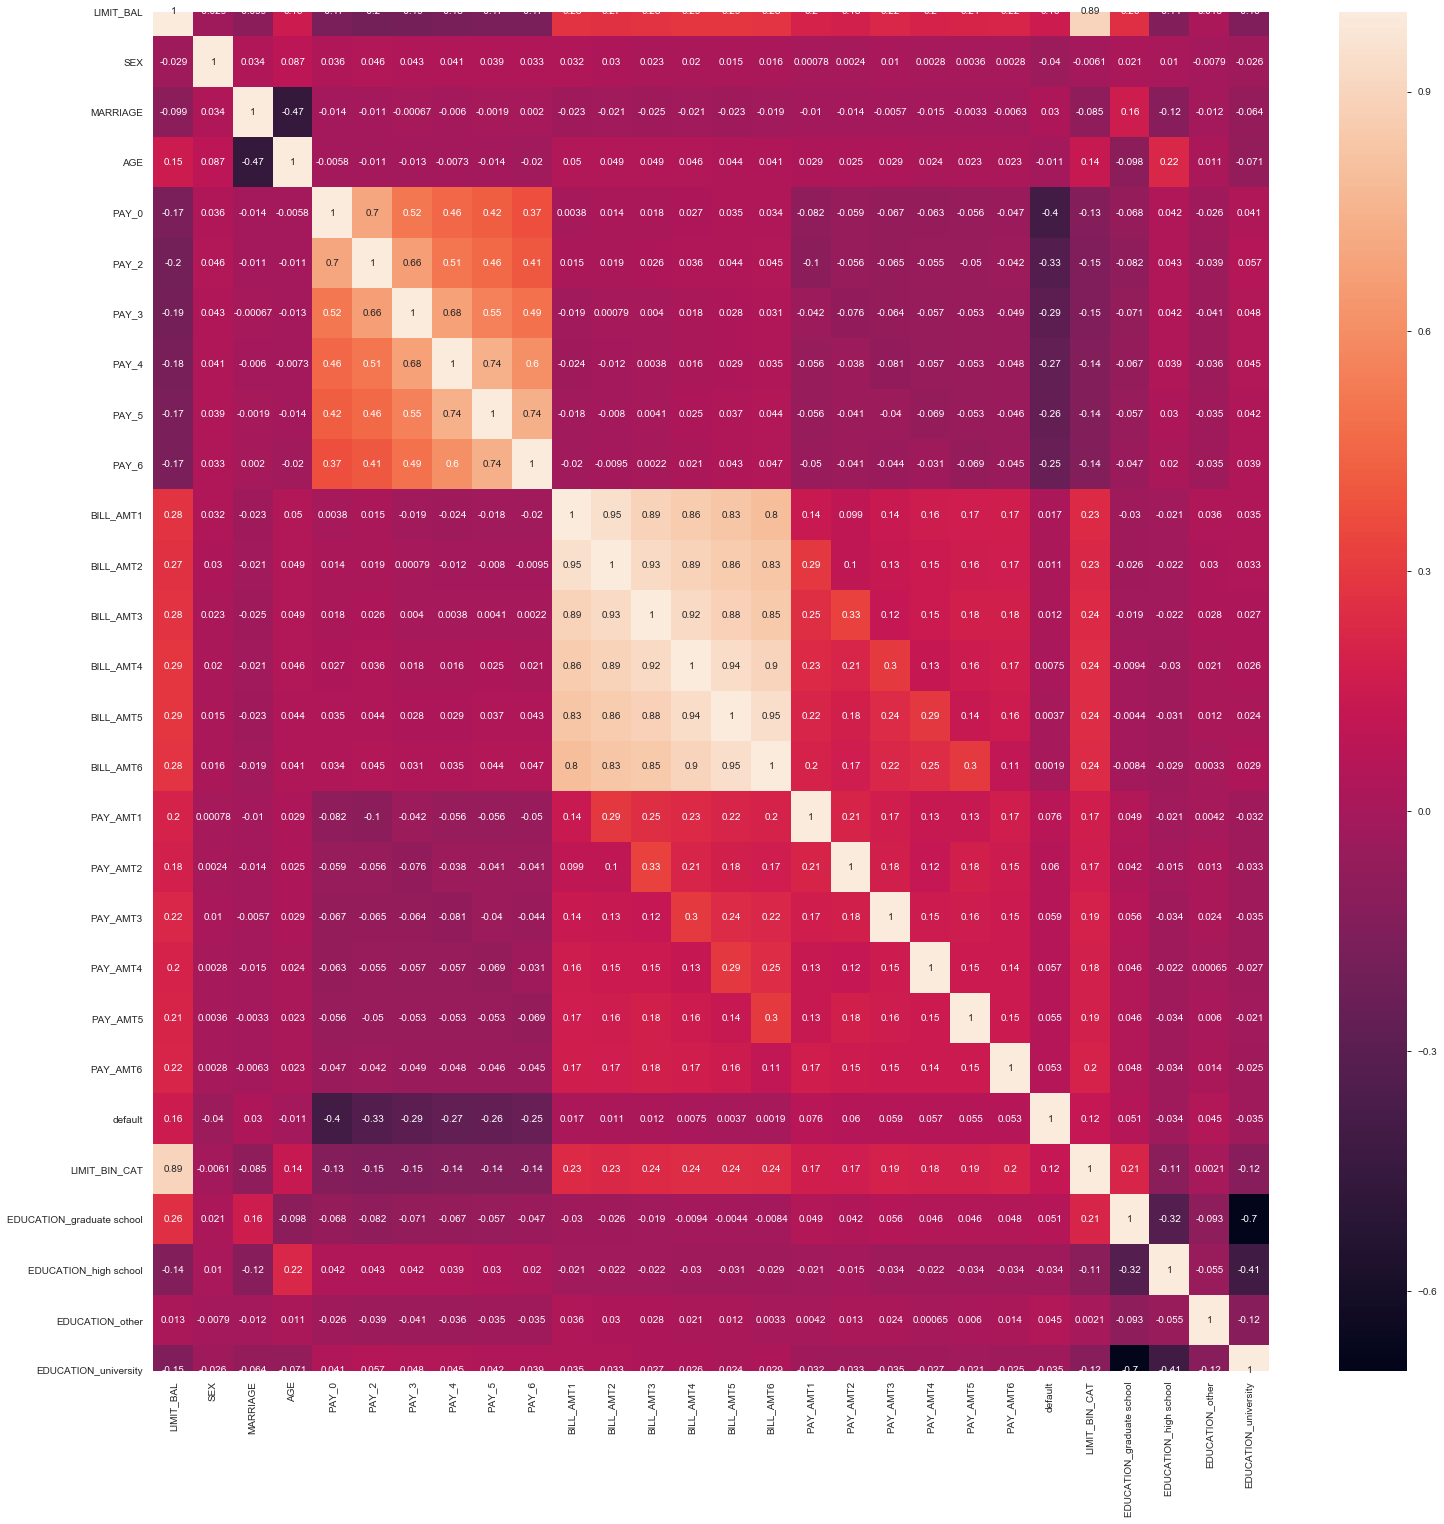

In [386]:
#correlation
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

# Evaluate Models

In [387]:
#Drop additional unneeded columns
credit = credit.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_6', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university'], axis=1)

In [388]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29242 entries, 0 to 29999
Data columns (total 20 columns):
LIMIT_BAL                    29242 non-null int64
SEX                          29242 non-null int64
MARRIAGE                     29242 non-null int64
AGE                          29242 non-null int64
PAY_4                        29242 non-null int64
BILL_AMT1                    29242 non-null int64
BILL_AMT2                    29242 non-null int64
BILL_AMT3                    29242 non-null int64
BILL_AMT4                    29242 non-null int64
BILL_AMT5                    29242 non-null int64
BILL_AMT6                    29242 non-null int64
PAY_AMT1                     29242 non-null int64
PAY_AMT2                     29242 non-null int64
PAY_AMT3                     29242 non-null int64
PAY_AMT4                     29242 non-null int64
PAY_AMT5                     29242 non-null int64
PAY_AMT6                     29242 non-null int64
default                      29242 non-nu

In [392]:
#Features (i stands for integer in iloc, iloc is exclusive of the 2nd number in range, iloc selects columns based on integer
#position, when using loc you use the column heading names and it is inclusive of both columns in range)
X = credit.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,16,17]]
print('Summary of feature sample')
X.shape

Summary of feature sample


(29242, 14)

In [393]:
#dependent variable is LIMIT_BAL_CAT
y = credit.loc[:,'LIMIT_BIN_CAT']
y.shape

(29242,)

In [394]:
X.head()

AGE  PAY_4  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   24      0       3913       3102        689          0          0   
1   26      0       2682       1725       2682       3272       3455   
2   34      0      29239      14027      13559      14331      14948   
3   37      0      46990      48233      49291      28314      28959   
4   57      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT6  default  
0          0         0       689         0         0         0        0  
1       3261         0      1000      1000      1000      2000        0  
2      15549      1518      1500      1000      1000      5000        1  
3      29547      2000      2019      1200      1100      1000        1  
4      19131      2000     36681     10000      9000       679        1

In [395]:
#Define the 3 selected models
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class.append(('Support Vector Classifier', SVC()))

In [396]:
#classification modeling
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring = 'accuracy')
    names.append(name)
    results.append(result)

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to 

In [397]:
# Get results of the 3 selected models
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7189656110789207
Gradient Boosting Classifier 0.7333285700255229
Support Vector Classifier 0.6803569382041229


In [398]:
#Train/Test Split 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

# Random Forest

In [399]:
#Modeling (Random Forest Classifier), default = 100 trees
algo = RandomForestClassifier()
model = algo.fit(X_train,y_train)
print (model)

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [400]:
#Make Predictions
predictions = model.predict(X_test)
accuracy_score = accuracy_score(y_test,predictions)
print('accuracy score: %.3f' % accuracy_score)

accuracy score: 0.720


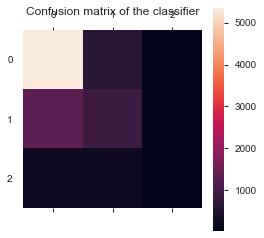

In [401]:
from sklearn.metrics import confusion_matrix
import pylab as pl
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [403]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      6004
           1       0.52      0.39      0.45      2255
           2       0.45      0.14      0.21       514

    accuracy                           0.72      8773
   macro avg       0.58      0.47      0.50      8773
weighted avg       0.69      0.72      0.70      8773



In [404]:
## Feature Importance

In [405]:
#feature importance determination (age, sept bill, and aug bill have the highest importance)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print (importances)

[0.09251917 0.00536881 0.10455243 0.10613433 0.08013701 0.07395891
 0.06669527 0.07288267 0.10230372 0.07272365 0.07217952 0.0632005
 0.07722834 0.01011567]
